In [1]:
import cv2
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import os
import random 
import gc


In [2]:
# function to draw image

def viewImage(image):
    cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
    cv2.imshow('Display', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
tumor_info = open('tumor_info.txt', 'r')
train_pos = []
train_neg = []

test_pos = []
test_neg = []

if(tumor_info.mode == 'r'):
    info = tumor_info.read()

elements = info.split('\n')
for element in elements:
    element_split = element.split(' ')
    if(len(element_split) > 1 ):
        element_split_split = element_split[0].split('b')

        if(element_split[2] == 'NORM'):
            if(int(element_split_split[1]) < 258):
                train_neg.append(element_split_split[1])
            else: 
                test_neg.append(element_split_split[1])

        else:
            if(int(element_split_split[1]) < 258):
                train_pos.append(element_split_split[1])
            else:
                test_pos.append(element_split_split[1])
                

train_pos = list(set(train_pos))
train_pos.sort()

train_neg = list(set(train_neg))
train_neg.sort()

test_pos = list(set(test_pos))
test_pos.sort()

test_neg = list(set(test_neg))
test_neg.sort()


# print(train_neg)
# print(len(train_neg))
# print(train_pos)
# print(len(train_pos))

# print(test_neg)
# print(len(test_neg))
# print(test_pos)
# print(len(test_pos))


train_images = train_pos + train_neg
random.shuffle(train_images)


148


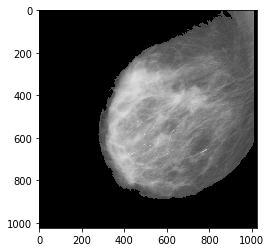

076


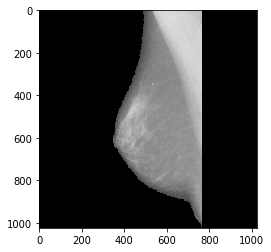

245


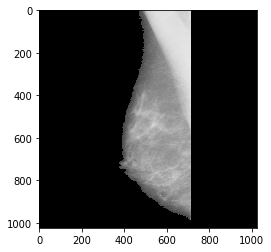

In [4]:
import matplotlib.image as mpimg 
path_for_images = 'new_train_images/'
for img in train_images[0:3]:
    print(img)
    image= cv2.imread(path_for_images + img + '.jpg')
    new_image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    imgplot = plt.imshow(new_image)
    plt.show()

In [5]:
train_images_pixels = []
train_labels = []
nrows = 150
ncols = 150

for image in train_images:
    train_images_pixels.append(cv2.resize(cv2.imread(path_for_images + image + '.jpg', cv2.IMREAD_COLOR), 
                               (nrows, ncols), interpolation= cv2.INTER_CUBIC))
    
    if(image in train_pos):
        train_labels.append(1)
    else:
        train_labels.append(0)  
# print(train_images_pixels)
# print(train_labels)

Text(0.5,1,'Labels for pos & neg')

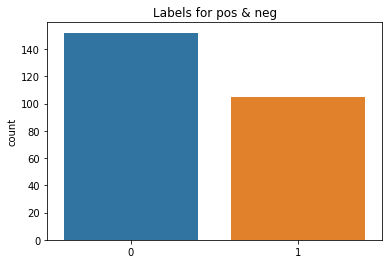

In [6]:
import seaborn as sns

train_images_pixels = np.array(train_images_pixels)
train_labels = np.array(train_labels)

sns.countplot(train_labels)
plt.title('Labels for pos & neg')


In [7]:
print('Shape of train image is: ', train_images_pixels.shape)
print('Shape of labels is: ', train_labels.shape)


Shape of train image is:  (257, 150, 150, 3)
Shape of labels is:  (257,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images_pixels, train_labels, test_size = 0.2, random_state=2)

print('Shape of train images is ', X_train.shape)
print('Shape of validation images is ', X_val.shape)
print('Shape of labels is ', y_train.shape)
print('Shape of validation labels is ', y_val.shape)




Shape of train images is  (205, 150, 150, 3)
Shape of validation images is  (52, 150, 150, 3)
Shape of labels is  (205,)
Shape of validation labels is  (52,)


In [9]:
ntrain = len(X_train)
nval = len(X_val)

batch_size = 16

In [51]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))  #Dropout for regularization

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# # model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))  #Dropout for regularization
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 256)     7168      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 128)       295040    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 15, 15, 64)        73792     
__________

In [53]:
model.compile(loss='mean_squared_error', optimizer= 'sgd', metrics=['acc'])
# optimizers.RMSprop(lr= 1e-4)

In [54]:
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [56]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=128,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/128
12/12 [==============================] - 5s 413ms/step - loss: 0.2484 - acc: 0.5710 - val_loss: 0.2472 - val_acc: 0.6250
Epoch 2/128
12/12 [==============================] - 2s 205ms/step - loss: 0.2470 - acc: 0.5885 - val_loss: 0.2474 - val_acc: 0.5833
Epoch 3/128
12/12 [==============================] - 2s 200ms/step - loss: 0.2454 - acc: 0.6198 - val_loss: 0.2410 - val_acc: 0.6944
Epoch 4/128
12/12 [==============================] - 2s 195ms/step - loss: 0.2475 - acc: 0.5803 - val_loss: 0.2477 - val_acc: 0.5556
Epoch 5/128
12/12 [==============================] - 2s 197ms/step - loss: 0.2460 - acc: 0.5794 - val_loss: 0.2432 - val_acc: 0.6250
Epoch 6/128
12/12 [==============================] - 2s 198ms/step - loss: 0.2477 - acc: 0.5586 - val_loss: 0.2432 - val_acc: 0.6111
Epoch 7/128
12/12 [==============================] - 2s 203ms/step - loss: 0.2454 - acc: 0.5907 - val_loss: 0.2497 - val_acc: 0.5278
Epoch 8/128
12/12 [==============================] - 2s 196ms/step - 

12/12 [==============================] - 2s 195ms/step - loss: 0.2381 - acc: 0.6100 - val_loss: 0.2154 - val_acc: 0.7500
Epoch 124/128
12/12 [==============================] - 2s 193ms/step - loss: 0.2505 - acc: 0.5356 - val_loss: 0.2432 - val_acc: 0.5833
Epoch 125/128
12/12 [==============================] - 2s 195ms/step - loss: 0.2335 - acc: 0.6399 - val_loss: 0.2327 - val_acc: 0.6458
Epoch 126/128
12/12 [==============================] - 2s 194ms/step - loss: 0.2414 - acc: 0.5940 - val_loss: 0.2525 - val_acc: 0.5278
Epoch 127/128
12/12 [==============================] - 2s 197ms/step - loss: 0.2542 - acc: 0.5177 - val_loss: 0.2342 - val_acc: 0.6389
Epoch 128/128
12/12 [==============================] - 2s 196ms/step - loss: 0.2392 - acc: 0.6042 - val_loss: 0.2340 - val_acc: 0.6389
